In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [11]:
!pip3 show pickle

In [2]:
data = pd.read_csv("loan_approval_dataset.csv")

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
#there is no null value
data.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [5]:
print(f' Number of duplicate values : {data.duplicated().sum()}')

 Number of duplicate values : 0


In [6]:
#eliminate unnecessary blanks in the beginning of the texts
data.columns = data.columns.str.strip()
data['education'] = data['education'].str.strip()
data['self_employed'] = data['self_employed'].str.strip()
data['loan_status'] = data['loan_status'].str.strip()

In [7]:
data['education'] = data['education'].apply(lambda x: 1 if x == 'Graduate' else 0)
data['self_employed'] = data['self_employed'].apply(lambda x: 1 if x == 'Yes' else 0)
data['loan_status'] = data['loan_status'].apply(lambda x: 1 if x == 'Approved' else 0)

In [8]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


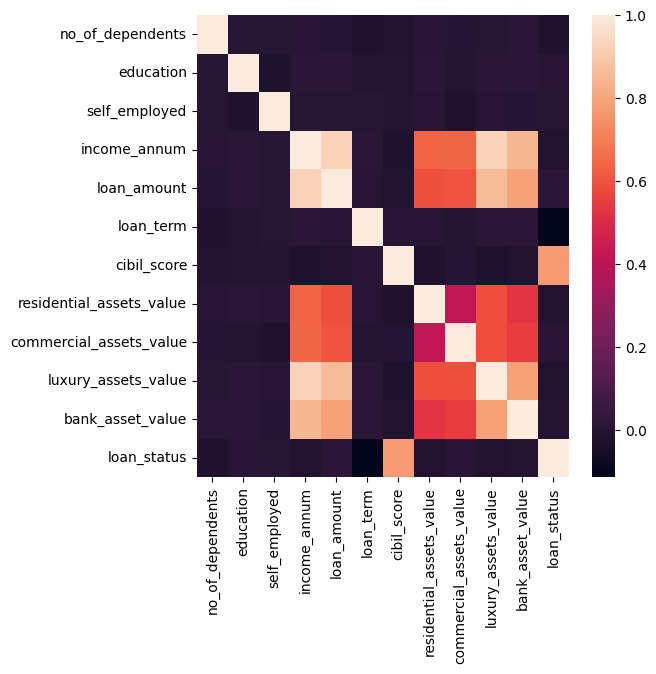

In [9]:
df = data.drop('loan_id', axis = 1)
correlation_matrix = df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix)
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   int64
 3   self_employed             4269 non-null   int64
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB


In [11]:
data['asset_values'] = data['residential_assets_value'] + data['commercial_assets_value'] + data['luxury_assets_value'] + data['bank_asset_value']

In [18]:
X = data.drop(['loan_status', 'loan_id' , 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'], axis = 1)
y = data['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,asset_values
0,2,1,0,9600000,29900000,12,778,50700000
1,0,0,1,4100000,12200000,8,417,17000000
2,3,1,0,9100000,29700000,20,506,57700000
3,3,1,0,8200000,30700000,8,467,52700000
4,5,0,1,9800000,24200000,20,382,55000000


In [20]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [21]:
# ML models will be created with Logistic Regression, Decision Tree Classifier, Random Forest and XGBoost

In [22]:
# Logistic Regression 

In [23]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7252146760343482
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.37      0.50       471
           1       0.72      0.93      0.81       810

    accuracy                           0.73      1281
   macro avg       0.74      0.65      0.65      1281
weighted avg       0.73      0.73      0.70      1281



In [24]:
# Decision Tree

In [25]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9882903981264637
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       471
           1       0.99      1.00      0.99       810

    accuracy                           0.99      1281
   macro avg       0.99      0.99      0.99      1281
weighted avg       0.99      0.99      0.99      1281



In [26]:
# Random Forest

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9812646370023419
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       471
           1       0.98      0.99      0.99       810

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



In [28]:
# XGBoost

In [29]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_pred = XGB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9836065573770492
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       471
           1       0.99      0.99      0.99       810

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



In [31]:
pickle.dump(log_reg, open('models/log_reg.pkl', 'wb'))
pickle.dump(decision_tree, open('models/decision_tree.pkl', 'wb'))
pickle.dump(rf, open('models/rf.pkl', 'wb'))
pickle.dump(XGB, open('models/XGB.pkl', 'wb'))